### IDs:
Insert yours IDs to the cell below

ID #1: 206337768

ID #2: 311515381


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [2]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as wg
import warnings
from IPython.display import display
from scipy.stats import binom
from scipy import stats
from scipy.stats import multinomial

warnings.filterwarnings('ignore')

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

In [20]:
def samples_by_prob(prob, p, x):
    
    """
    Description
    -----------
    This function calculates the number of independent samples that are required
    in order to get at least 'x' defectives with a confidence of 'prob'
    while the probability of a defective is 'p'
    
    Args
    ----
    prob (float) = the desired cofidence probability
    p (float) = probability of a defective product
    x (int) = the threshold of defective products
    
    Returns
    -------
    Number of independent samples that are required (int)
    """
    
    cdf_list = []
    x = x - 1
    prob = 1 - prob
    n_samples = 0
    cdf = 1
    while cdf > prob:
        n_samples += 1
        rv = binom(n_samples, p)
        cdf = rv.cdf(x)
        cdf_list.append(cdf)
        
    return f"Number of samples that are required is {n_samples}" 

In [21]:
print(samples_by_prob(0.85, 0.03, 1))

Number of samples that are required is 63


#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [22]:
print(samples_by_prob(0.95, 0.04, 1))

Number of samples that are required is 74


#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

In [23]:
print(f"Distribution 1:\n{samples_by_prob(0.9, 0.1, 5)}\nThe Variance is {binom(78, 0.1).var():.2f}")
print(f"\nDistribution 2:\n{samples_by_prob(0.9, 0.3, 15)}\nThe Variance is {binom(64, 0.3).var()}")

Distribution 1:
Number of samples that are required is 78
The Variance is 7.02

Distribution 2:
Number of samples that are required is 64
The Variance is 13.44


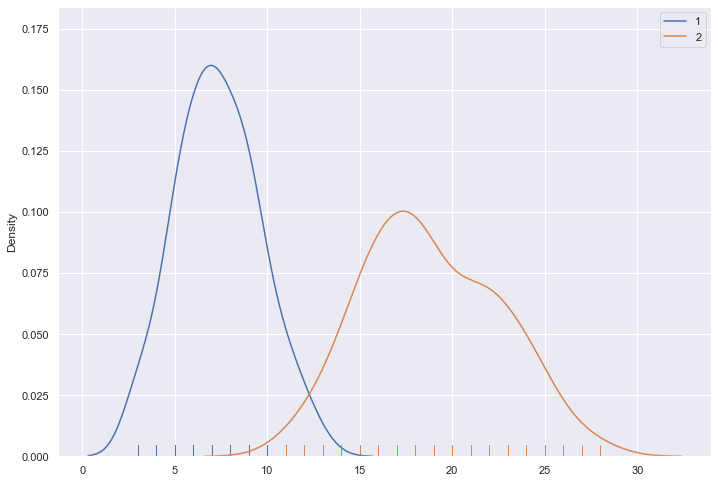

In [26]:
sns.set(font_scale=1.2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
data_binom = binom.rvs(n=78,p=0.1,loc=0,size=100)
data_binom_2 = binom.rvs(n=64, p=0.3, loc=0, size=100)
ax = sns.distplot(data_binom, rug=True, hist=False, label='1')
ax = sns.distplot(data_binom_2, rug=True, hist=False, label='2')
ax.legend()

Although the probability and the number of desired defectives increased by the same ratio between distribution 1 and distribution 2, the number of samples required in distribution 1 is higher than 2.

An explanation for this outcome might be that the variance of distribution 2 is almost twice bigger than the variance of distribution 1.

A lower variance means a smaller probability to get extreme values, therefore, to achieve the same probability of distribution 2, a higher number of samples is required.

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

### <ins>Scenarii 1</ins>

SH mean rent is 6306 RCU
SH median rent is 4600 RCU
SH IQR rent is 3208 RCU

------------------------------

RG mean rent is 4198 RCU
RG median rent is 4600 RCU
RG IQR rent is 3799

------------------------------

Is the IQR of SH is smaller than RG --> True


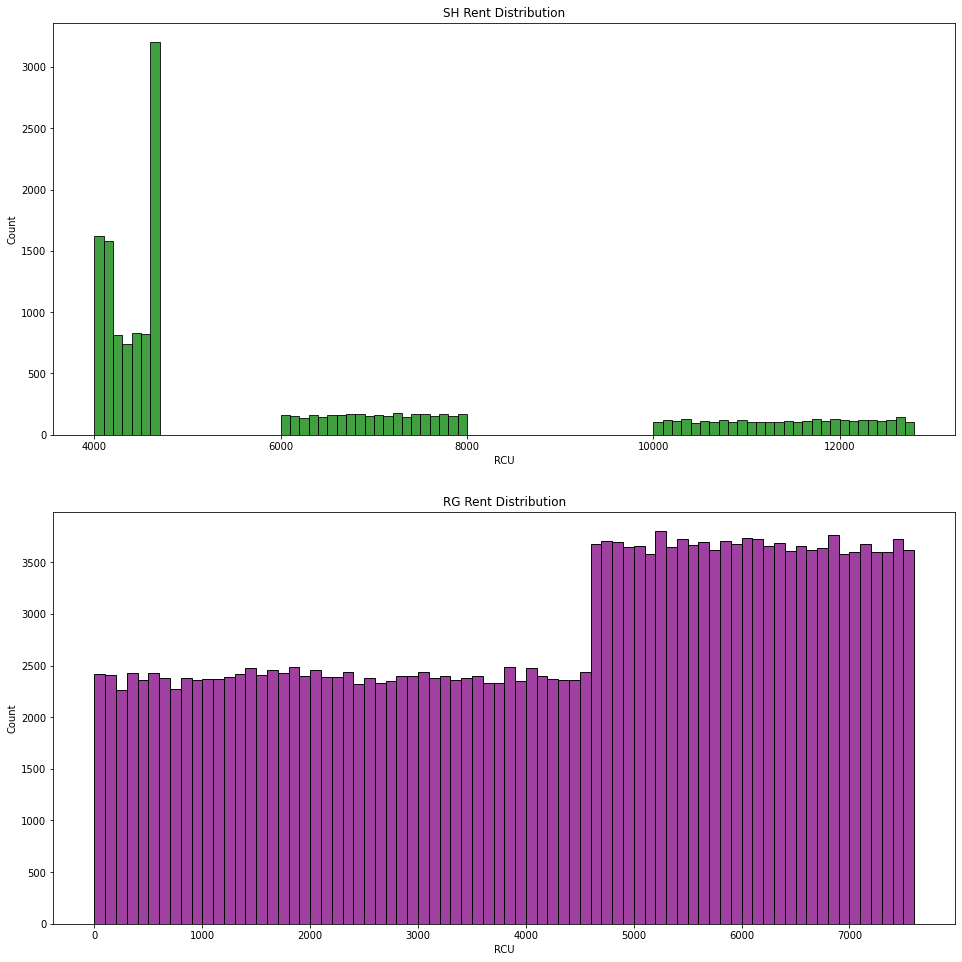

In [32]:
# set the population of each neighborhood
sh_pop = 16000
rg_pop = 22000

## SH ## 

# rent data
sh_rent_array_1 = np.random.randint(4000, 4200,3200)
sh_rent_array_2 = np.random.randint(4200, 4600, 3200)
sh_rent_array_3 = np.random.randint(4600, 4601, 3200)
sh_rent_array_4 = np.random.randint(6000, 8000, 3200)
sh_rent_array_5 = np.random.randint(10000, 12800, 3200)
sh_rent_1= np.concatenate(( sh_rent_array_1, sh_rent_array_2,sh_rent_array_3,sh_rent_array_4,sh_rent_array_5))


# print the values
print(f"SH mean rent is {np.mean(sh_rent_1) :.0f} RCU")
print(f"SH median rent is {np.median(sh_rent_1) :.0f} RCU")
print(f"SH IQR rent is {stats.iqr(sh_rent_1, interpolation = 'midpoint'):.0f} RCU\n")

## RG ##

# RG data
rg_rent_array_1 = np.random.randint(0, 4600, 110000)
rg_rent_array_2 = np.random.randint(4600, 7600,110000)
rg_rent_1 = np.concatenate((rg_rent_array_1, rg_rent_array_2))

# print the values
print('-'*30)
print(f"\nRG mean rent is {np.mean(rg_rent_1) :.0f} RCU")
print(f"RG median rent is {np.median(rg_rent_1) :.0f} RCU")
print(f"RG IQR rent is {stats.iqr(rg_rent_1, interpolation = 'midpoint'):.0f}\n")

# check that the IQR of SH is smaller than RG
print('-'*30)
print(f"\nIs the IQR of SH is smaller than RG --> {stats.iqr(sh_rent_1, interpolation = 'midpoint') < stats.iqr(rg_rent_1, interpolation = 'midpoint')}")

# visualization
fig, axes = plt.subplots(2, 1, figsize=(14,14))
sns.histplot(ax=axes[0], data=sh_rent_1, binwidth=100, legend=False, color='green')
axes[0].set_title("SH Rent Distribution")
axes[0].set_xlabel('RCU')
sns.histplot(ax=axes[1], data=rg_rent_1, binwidth=100, legend=False, color='purple')
axes[1].set_title("RG Rent Distribution")
axes[1].set_xlabel('RCU')
fig.tight_layout(pad=3.0)

### <ins>Scenarii 2</ins>

SH mean rent is 6300
SH median rent is 4600
SH IQR is 2550

------------------------------

RG mean rent is 4200
RG median is 4600
RG IQR is 4870
------------------------------

Is the IQR of SH is smaller than RG --> True


Text(0.5, 0, 'RCU')

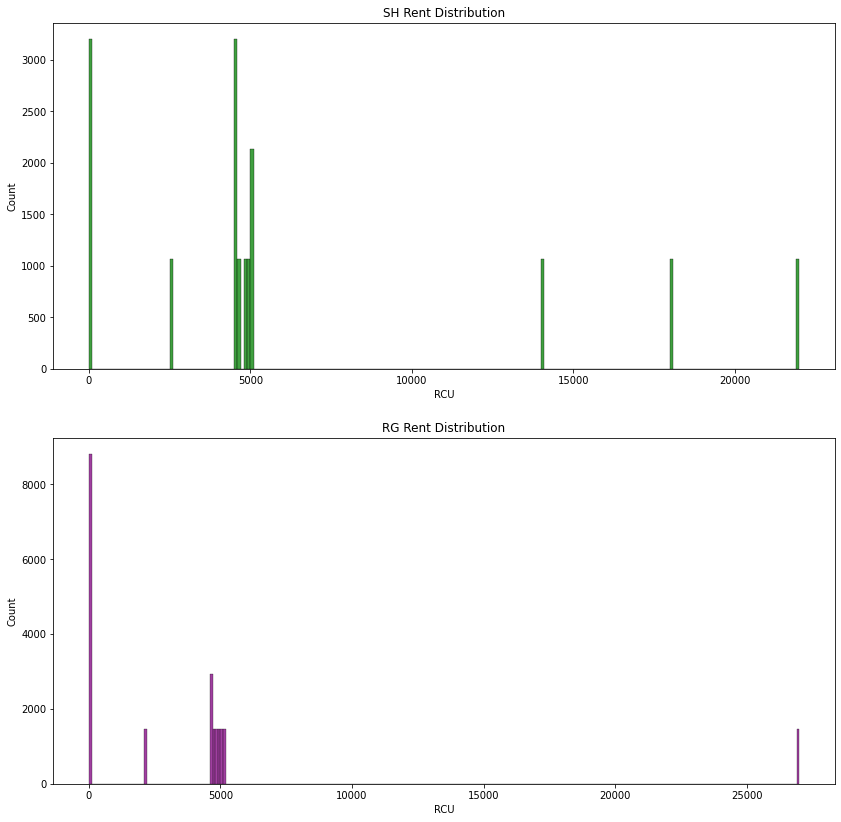

In [33]:
## SH

# rent data
sh_rent_dist = [0 ,10 ,20 ,2500, 4500, 4530, 4590, 4600, 4800, 4900, 5000, 5050, 14000, 18000, 22000]
sh_rent_2 = sh_rent_dist*int(sh_pop/len(sh_rent_dist))

# print values
print(f"SH mean rent is {np.mean(sh_rent_2):.0f}")
print(f"SH median rent is {np.median(sh_rent_2):.0f}")
print(f"SH IQR is {stats.iqr(sh_rent_2, interpolation='midpoint'):.0f}\n")

## RG ##

# rent data
rg_rent_dist = [0, 10, 20, 30, 40, 50, 2100, 4600, 4650, 4700, 4800, 4900, 5000, 5100, 27000]
rg_rent_2 = rg_rent_dist*int(rg_pop/len(rg_rent_dist))

# print values
print('-'*30)
print(f"\nRG mean rent is {np.mean(rg_rent_2):.0f}")
print(f"RG median is {np.median(rg_rent_2):.0f}")
print(f"RG IQR is {stats.iqr(rg_rent_2):.0f}")

# check that the IQR of SH is smaller than RG
print('-'*30)
print(f"\nIs the IQR of SH is smaller than RG --> {stats.iqr(sh_rent_2, interpolation = 'midpoint') < stats.iqr(rg_rent_2, interpolation = 'midpoint')}")

# visualization
fig, axes = plt.subplots(2, 1, figsize=(14,14))
sns.histplot(ax=axes[0], data=sh_rent_2, bins=sh_rent_2, binwidth=100, legend=False, color='green')
axes[0].set_title("SH Rent Distribution")
axes[0].set_xlabel('RCU')
sns.histplot(ax=axes[1], data=rg_rent_2, bins=rg_rent_2, binwidth=100, legend=False, color='purple')
axes[1].set_title("RG Rent Distribution")
axes[1].set_xlabel('RCU')

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

### <ins>Scenarii 3</ins>

sh mean rent is 6300 RCU
sh median rent is 4600 RCU
sh IQR rent is 450
sh var is 12707667

------------------------------

rg mean rent is 4200 RCU
rg median rent is 4600 RCU
rg IQR rent is 3600
rg var is 6787667
------------------------------

Is the IQR of SH is smaller than RG --> True
Is the Variance of SH is higher than RG --> True


Text(0.5, 0, 'RCU')

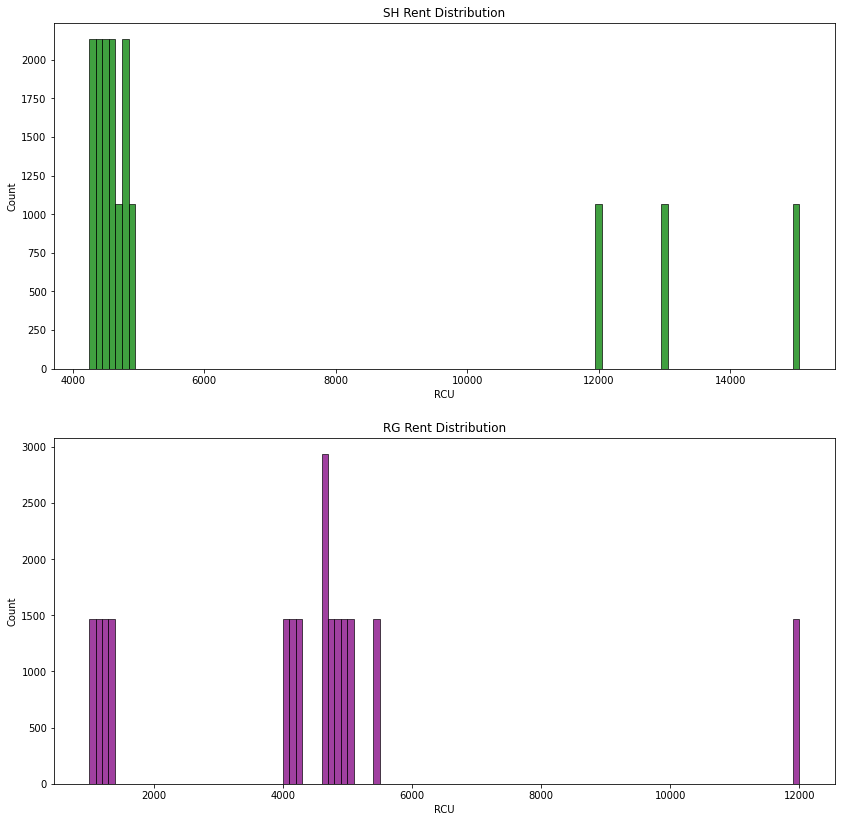

In [34]:
## SH

# rent data
rent_sh_dist = [4250 ,4300 ,4350 ,4400, 4450, 4500, 4550, 4600, 4700, 4750, 4800, 4850, 12000, 13000, 15000]
rent_sh = rent_sh_dist*int(sh_pop/len(rent_sh_dist))

# print values
print(f"sh mean rent is {np.mean(rent_sh):.0f} RCU")
print(f"sh median rent is {np.median(rent_sh):.0f} RCU")
print(f"sh IQR rent is {stats.iqr(rent_sh, interpolation = 'midpoint'):.0f}")
print(f"sh var is {np.var(rent_sh):.0f}\n")

## RG

# rent data
rent_rg_dist = [1000, 1100, 1200, 1300, 4000, 4100, 4200, 4600, 4650, 4700, 4800, 4900, 5000, 5450, 12000]
rent_rg = rent_rg_dist*int(rg_pop/len(rent_rg_dist))

# print values
print('-'*30)
print(f"\nrg mean rent is {np.mean(rent_rg):.0f} RCU")
print(f"rg median rent is {np.median(rent_rg):.0f} RCU")
print(f"rg IQR rent is {stats.iqr(rent_rg, interpolation = 'midpoint'):.0f}")
print(f"rg var is {np.var(rent_rg):.0f}")

# check that the IQR of SH is smaller than RG
# check that the rent in SH have a higher variance than the rent in RG
print('-'*30)
print(f"\nIs the IQR of SH is smaller than RG --> {stats.iqr(rent_sh, interpolation = 'midpoint') < stats.iqr(rent_rg, interpolation = 'midpoint')}")
print(f"Is the Variance of SH is higher than RG --> {np.var(rent_rg) < np.var(rent_sh)}")

# visualization
fig, axes = plt.subplots(2, 1, figsize=(14,14))
sns.histplot(ax=axes[0], data=rent_sh, bins=rent_sh, binwidth=100, legend=False, color='green')
axes[0].set_title("SH Rent Distribution")
axes[0].set_xlabel('RCU')
sns.histplot(ax=axes[1], data=rent_rg, bins=rent_rg, binwidth=100, legend=False, color='purple')
axes[1].set_title("RG Rent Distribution")
axes[1].set_xlabel('RCU')

The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

The equation above is actually the correlation equation where $\alpha$ is the correlation between the 'rent' and the 'per household income' variables.


$$\frac{Cov(rent,PHI)}{\sqrt{Var(rent)}*\sqrt{Var(PHI)}}=\alpha$$

So in order to display the consistency of the data with these findings, we would calculate the correlation between those two variables for each neighborhood


In [35]:
## SH

# PHI data
phi_sh_dist = [10550, 11111, 11342, 11374, 11376, 11388, 11520, 12000, 12020, 12150, 12200, 12250, 16000, 16070, 16150]
phi_sh = phi_sh_dist*int(sh_pop/len(phi_sh_dist))

# print values
print(f"SH mean PHI is {np.mean(phi_sh):.0f} RCU")
print(f"SH median PHI is {np.median(phi_sh):.0f} RCU")
print(f"\nThe correlation between rent & PHI in SH is {np.corrcoef(rent_sh, phi_sh)[0,1]*100:.2f}%\n")

## RG

# PHI data
# rg_rent_sc_2 = [1000, 1100, 1200, 1300, 4000, 4100, 4200, 4600, 4650, 4700, 4800, 4900, 5000, 5450, 12000]
phi_rg_dist = [2200, 2350, 2700, 6300, 6700, 6900, 7200, 8000, 8100, 8150, 8300, 8600, 9000, 19000, 24000]
phi_rg = phi_rg_dist*int(rg_pop/len(phi_rg_dist))

# print values
print('-'*30)
print(f"\nRG mean PHI is {np.mean(phi_rg):.0f} RCU")
print(f"RG median PHI is {np.median(phi_rg):.0f} RCU")
print(f"\nThe correlation between rent & PHI in RG is {np.corrcoef(rent_rg, phi_rg)[0,1]*100:.2f}%")

SH mean PHI is 12500 RCU
SH median PHI is 12000 RCU

The correlation between rent & PHI in SH is 97.05%

------------------------------

RG mean PHI is 8500 RCU
RG median PHI is 8000 RCU

The correlation between rent & PHI in RG is 89.75%


#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

Text(0, 0.5, 'PHI')

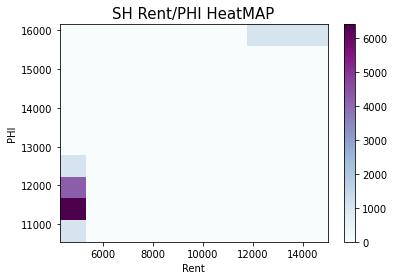

In [37]:
plt.hist2d(x=rent_sh, y=phi_sh, bins=10, cmap=plt.cm.BuPu)
plt.colorbar()
plt.title('SH Rent/PHI HeatMAP', fontsize=15)
plt.xlabel('Rent')
plt.ylabel('PHI')


Text(0, 0.5, 'PHI')

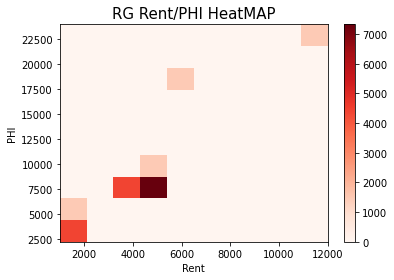

In [38]:
plt.hist2d(x=rent_rg, y=phi_rg, bins=10, cmap=plt.cm.Reds)
plt.colorbar()
plt.title('RG Rent/PHI HeatMAP', fontsize=15)
plt.xlabel('Rent')
plt.ylabel('PHI')

### Question 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that X is a vector of counts.


2. Let $Y = X_2 + X_3 + X_4$ be a random variable.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to the calculation in class for the centralized third moment of the **binomial** distribution and explain your observation.

In [226]:
# define a random variable 'x' ~ Multinomial
x_rv = multinomial(20,[0.2, 0.1, 0.1, 0.1, 0.2, 0.3])

# define a random variable Y = X2 + X3 + X4
y = x_rv.rvs()[:, 1:4].sum()

# perform 100 experiments where x is sampled
k_exp = x_rv.rvs(100)[:,1:4] # the Y variable contains only x2, x3 & x4

y_k_exp = k_exp.sum(axis=1) # sum of Y based on K experiments

y_mean = (np.mean(y_k_exp)) # mean of Y based on K experiments

# empirical centralized third moment of Y based on the K experiments
cm_Y = np.mean(((y_k_exp-y_mean)**3))
cm_Y

-2.1238080000000026

It seems that each time the code runs it returns a different value of the centralized third moment. This could be explained by the fact that the random variable 'x' is generated randomally.

So in order to get a more stable value, we would try to run the above code multiple times, then it might converge to the real value

The centralized third moment converged to the value 1.6504077911392405
The value from the calculation in class is 1.6799999999999997


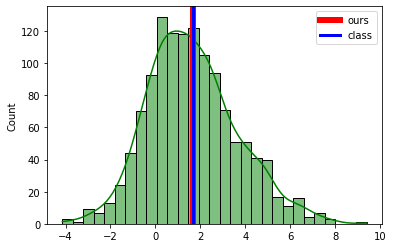

In [227]:
my_list = []
exp_number = int(random.randint(1000,2000))
for i in range(exp_number):
    x_rv = multinomial(20,[0.2, 0.1, 0.1, 0.1, 0.2, 0.3])
    y = x_rv.rvs(100)[:,1:4]
    y = y.sum(axis=1)
    y_mean = np.mean(y)
    cm_Y = np.mean(((y-y_mean)**3))
    my_list.append(cm_Y)

# print the values
print(f"The centralized third moment converged to the value {np.mean(my_list)}\nThe value from the calculation in class is {20*0.3*(0.7)*(1-2*0.3)}")

# visualize the output
f, ax_hist = plt.subplots(1)
sns.histplot(data=my_list, kde=True, ax=ax_hist, color='green')
ax_hist.axvline(np.mean(my_list), color='r', linestyle='-', lw=6, label='ours')
ax_hist.axvline((20*0.3*(0.7)*(1-2*0.3)), color='b', linestyle='-', lw=3, label='class')
ax_hist.legend()

$$X \sim MNom(N, P) \Rightarrow Y = X{i} + X{j} + X{k}\sim Binom(N, P{i}+P{j}+P{k})$$

Y is a random variable of a binomial distribution, thus the equation to calculate the central 3rd moment of Y is $np(1-p)(1-2p)$.

As can be seen in the output above, after running the code multiple times (random number of times between 1000-2000) the mean value converged to a value that is quite close to the value that was calculated based on the class example.

This could be explained by the 'Central Limit Theorem'. The Y variables sampled <ins>independently</ins> from <ins>the same distribution</ins>, so by sampeling many times and averaging the distance from the mean is standard noramlly distributed.

### Question 4 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

$$\textrm{Var}{(X+Y+Z)} =\newline\textrm{E}[(X+Y+Z)^2]-[\textrm{E}(X+Y+Z)]^2 =\newline\textrm{E}[X^2+Y^2+Z^2+2XZ+2XY+2YZ]-[\textrm{E}(X+Y+Z)]^2 = \newline[\textrm{E}(X^2)+\textrm{E}(Y^2)+\textrm{E}(Z^2)+2\textrm{E}(XZ)+2\textrm{E}(XY)+2\textrm{E}(ZY)]-[\textrm{E}(X)+\textrm{E}(Y)+\textrm{E}(Z)]^2 =\newline[\textrm{E}(X^2)+\textrm{E}(Y^2)+\textrm{E}(Z^2)+2\textrm{E}(XZ)+2\textrm{E}(XY)+2\textrm{E}(ZY)]-[\textrm{E}(X)^2+\textrm{E}(Y)^2+\textrm{E}(Z)^2+2\textrm{E}(X)\textrm{E}(Y)+2\textrm{E}(X)\textrm{E}(Z)+2\textrm{E}(Y)\textrm{E}(Z)]\newline[\textrm{E}(X^2)-\textrm{E}(X)^2]+[\textrm{E}(Y^2)-\textrm{E}(Y)^2]+[\textrm{E}(Z^2)-\textrm{E}(Z)^2]+2[\textrm{E}(XY)-\textrm{E}(X)\textrm{E}(Y)]+2[\textrm{E}(XZ)-\textrm{E}(X)\textrm{E}(Z)]+2[\textrm{E}(YZ)-\textrm{E}(Y)\textrm{E}(Z)] =$$

$$\newline\newline\textrm{Var}{(X)}+\textrm{Var}{(Y)}+\textrm{Var}{(Z)}+2\textrm{Cov}(X,Y)+2\textrm{Cov}(X,Z)+2\textrm{Cov}(Y,Z)$$

If X,Y,Z are pairwise independent then without loss of generality for each pair X,Y: 

$$\newline\Rightarrow\textrm{Cov}(X,Y) = \textrm{E}(XY)-\textrm{E}(X)\textrm{E}(Y) = ^{independency} \textrm{E}(X)\textrm{E}(Y)-\textrm{E}(X)\textrm{E}(Y) = 0$$

Even if X,Y,Z are pairwise independent they are not necessarily collectively independent. For example, let $X \sim MNom(n,p)$ where the random variables $X{i}$ indicates the number of times outcome number i is observed over the n trials,then each pair $X{i} \sim Binom(n,P{i})$ & $X{j} \sim Binom(n,P{j})$ is independent. $\textbf{But}$ their outcomes are dependent because they must be summed to n.

### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [258]:
def NFoldConv(P, n):
    """
    Description
    -----------
    This function gets a distribution P of a random variable and the number of repetitions
    and returns the distribution of the sum of the independent repeats
    
    Args
    ----
    P (array) = A finite distribution of a random variable
    n (int) = number of repeats
    
    Returns
    -------
    The distribution of the sum of the independent repeats
    """
    conv_count = P
    i = 1
    while i < n:
        conv_count = np.convolve(P, conv_count)
        i += 1
    return conv_count

array([0.04, 0.04, 0.09, 0.04, 0.04])

#### 5.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


Text(0.5, 1.0, 'Single octahedron distribution')

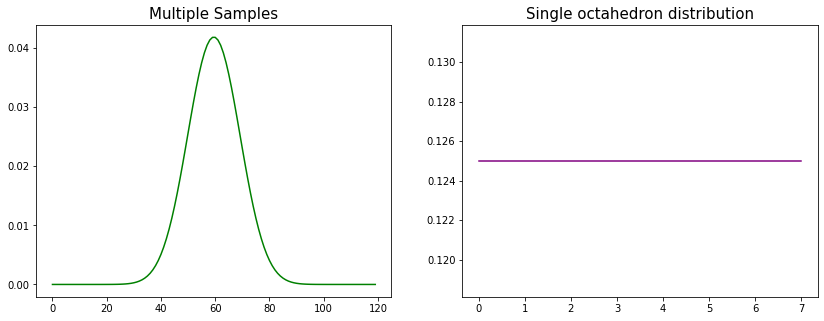

In [244]:
x = np.ones(8)*1/8
Q = NFoldConv(P=x, n=17)
# plt.plot(Q)
fig, axes = plt.subplots(1, 2, figsize=(14,5))
axes[0].plot(Q, color='green')
axes[0].set_title("Multiple Samples", fontsize=15)
axes[1].plot(x, color='purple')
axes[1].set_title("Single octahedron distribution", fontsize=15)

$\Rightarrow$ According to the 'Central Limit Theorem' after sampling multiple times, the sum of the indepent repeats is standard normally distributed